#Q1. block elimination

1. The disk surface is an 8*8 matrix, black is filled, and gray is not filled (the black position cannot be filled repeatedly)
2. When all 8 grids of a row or column are filled, they can be eliminated (the row or column turns gray)
3. There are 31 types of optional blocks as shown below:

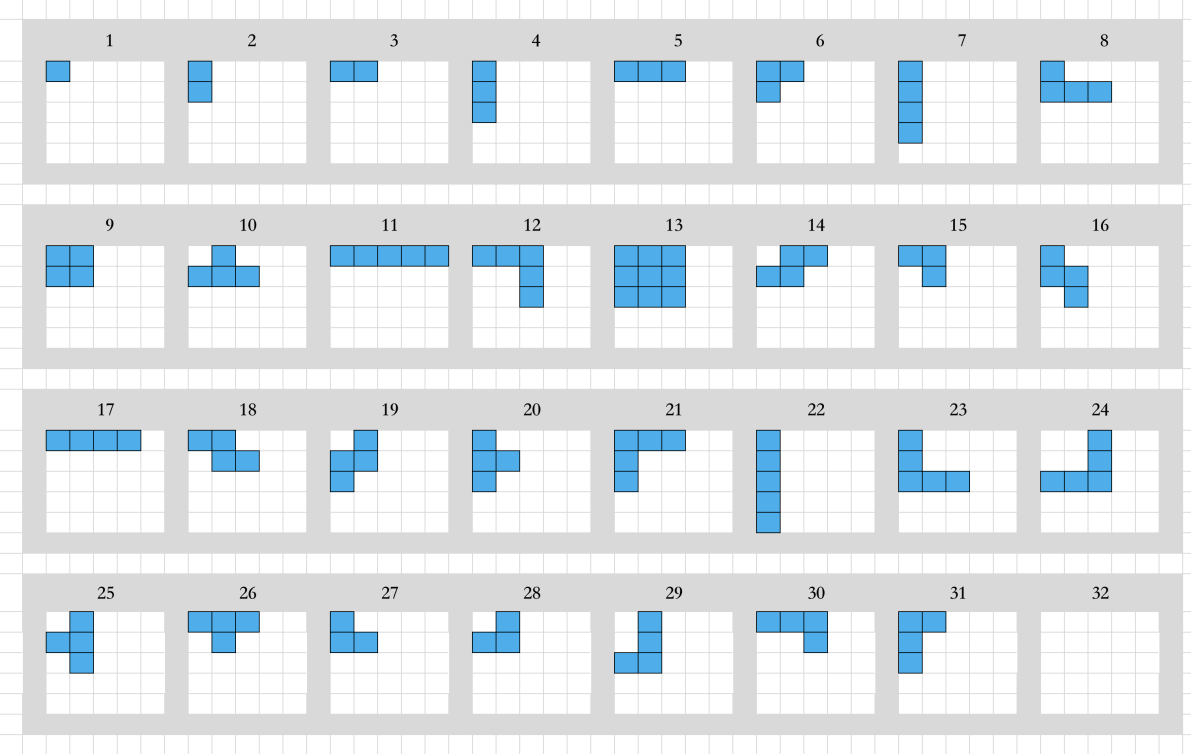

4. Select 3 types from 31 types, which need to meet:
At least one of the blocks cannot be placed on the disk, and the rest of the blocks can be placed on the disk
The blocks that can be placed on the disk (1 block or a combination of 2) must be eliminated so that the blocks that cannot be placed on the disk can be placed on the disk.

The disk status is as follows:

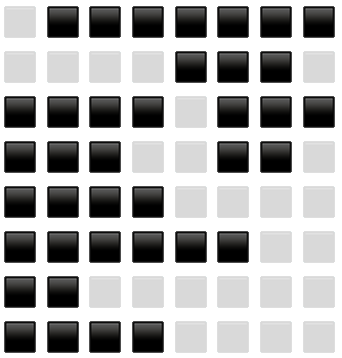

Q: Please list all eligible combination blocks

game download:

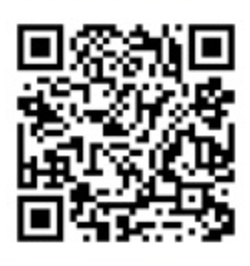

#About the Game

The game is a modified version of classical Tetris.

#Step 1: Creating the Puzzle

Puzzle will be generated as the basis of our work to plot and to manipulate in the rest of the project.

In [ ]:
#Importing Libs
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from itertools import permutations

inArr = np.array([[0,1,1,1,1,1,1,1],
                  [0,0,0,0,1,1,1,0],
                  [1,1,1,1,0,1,1,1],
                  [1,1,1,0,0,1,1,0],
                  [1,1,1,1,0,0,0,0],
                  [1,1,1,1,1,1,0,0],
                  [1,1,0,0,0,0,0,0],
                  [1,1,1,1,0,0,0,0]])

#Ploting Puzzle

This function would plot the given puzzle with the given dim.

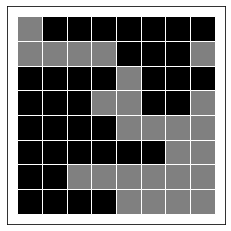

In [ ]:
def plot_Board(inArr, row, col):
  reversedArr = np.flip(inArr, axis=0)
  plt.axes()
  for i in range(0,row):
    for j in range(0,col):
      if reversedArr[i,j]==1:
        rectangle = plt.Rectangle((j,i), 1, 1, fc='black',ec="white")
        plt.gca().add_patch(rectangle)
      else:
        rectangle = plt.Rectangle((j,i), 1, 1, fc='gray',ec="white")
        plt.gca().add_patch(rectangle)
  plt.axis('scaled')
  plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
  plt.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=False,         
    labelleft=False) 
  plt.show()

plot_Board(inArr,8 ,8)

#List of Blocks

Generating 3D array of blocks that are going to be used later on.

FYI: I could also write the code to read images to generate the blocks, however 0 and 1 arrays are the fastest way and it could be optimized later on.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


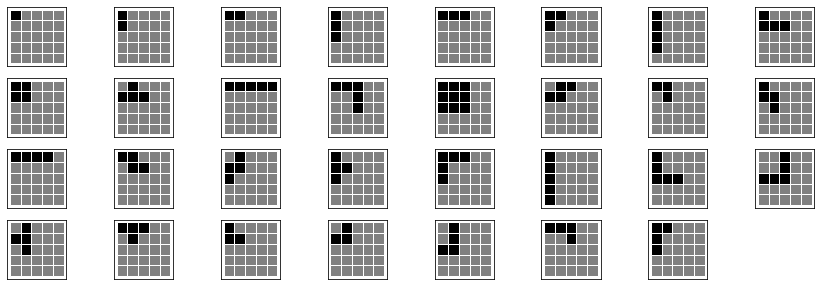

In [ ]:
blk = np.zeros((5,5,31))
blk[:,:,0] = [[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,1] = [[1,0,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,2] = [[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,3] = [[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,4] = [[1,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,5] = [[1,1,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,6] = [[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[0,0,0,0,0]]
blk[:,:,7] = [[1,0,0,0,0],[1,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,8] = [[1,1,0,0,0],[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,9] = [[0,1,0,0,0],[1,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,10] = [[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,11] = [[1,1,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,12] = [[1,1,1,0,0],[1,1,1,0,0],[1,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,13] = [[0,1,1,0,0],[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,14] = [[1,1,0,0,0],[0,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]] 
blk[:,:,15] = [[1,0,0,0,0],[1,1,0,0,0],[0,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,16] = [[1,1,1,1,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,17] = [[1,1,0,0,0],[0,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]] 
blk[:,:,18] = [[0,1,0,0,0],[1,1,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,19] = [[1,0,0,0,0],[1,1,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,20] = [[1,1,1,0,0],[1,0,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,21] = [[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0]]
blk[:,:,22] = [[1,0,0,0,0],[1,0,0,0,0],[1,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,23] = [[0,0,1,0,0],[0,0,1,0,0],[1,1,1,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,24] = [[0,1,0,0,0],[1,1,0,0,0],[0,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,25] = [[1,1,1,0,0],[0,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,26] = [[1,0,0,0,0],[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,27] = [[0,1,0,0,0],[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,28] = [[0,1,0,0,0],[0,1,0,0,0],[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,29] = [[1,1,1,0,0],[0,0,1,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
blk[:,:,30] = [[1,1,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]

#plotting the blocks to double check
for k in range(0,31):
  reversedArr = np.flip(blk[:,:,k], axis=0)
  for i in range(0,5):
    for j in range(0,5):
      if reversedArr[i,j]==1:
        rectangle = plt.Rectangle((j,i), 1, 1, fc='black',ec="white")
        plt.subplot(4,8, k+1)
        plt.gca().add_patch(rectangle)
        plt.gcf().set_size_inches(15, 5)
      else:
        rectangle = plt.Rectangle((j,i), 1, 1, fc='gray',ec="white")
        plt.subplot(4,8, k+1)
        plt.gca().add_patch(rectangle)
        plt.gcf().set_size_inches(15, 5)
  plt.axis('scaled')
  plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
  plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False) 
plt.show()

#Padding

We'll manipulate padding to check if the block can fit in a specific part of the puzzle.

In [ ]:
def PadArr(in_Array, val):
  temp = in_Array
  temp = np.pad(temp, (4, 4), 'constant', constant_values=(val))
  temp = np.delete(temp, [0,1,2,3], 0)
  temp = np.delete(temp, [0,1,2,3], 1)
  return temp

#Frame

Making it easy to get a 5 times 5 frame out of our padded puzzle.

In [ ]:
def GetFrame(in_Array, row, col):
  out = np.zeros(5)
  out = in_Array[row:row+5,col:col+5]
  return out

#Getting Options

Getting a list of valid moves for a specific block. Sum the given block with the frames generated from (0,0) to the end and if the sum of frame and block is = 2 the move is invalide else it's a feasible move.

In [ ]:
def GetOpts(GameBoard, MyBlk):
  temp = PadArr(GameBoard, 1)
  buff = np.zeros(5)
  sum = np.zeros(5)
  out = []
  for i in range(0,8):
    for j in range(0,8):
      buff = GetFrame(temp, i, j)
      sum = np.add(buff,MyBlk)
      if 2 in sum:
        pass
      else:
        out.append((i,j))
  return out

#List of Options

Getting the list of valid moves for each block in the first move.

In [ ]:
MOV_1 = []
for i in range(0,31):
  temp = GetOpts(inArr, blk[:,:,i])
  MOV_1.append((i,temp))

#Update Puzzle

Updating our puzzle after a move has been applied. It'll be called during the final process.

FYI: we'll only update the puzzle for valid moves, later can be optimized to check if the move is valid or not.

In [ ]:
def Update_Game(GameBoard, row, col, MyBlk):
  buff = PadArr(GameBoard, 0)
  temp = GetFrame(buff, row, col) + MyBlk
  buff[row:row+5,col:col+5] = temp 
  buff = np.delete(buff, [8, 9, 10, 11], 0)
  buff = np.delete(buff, [8, 9, 10, 11], 1)
  Mysum = []
  Mysum = np.sum(buff, axis=0)
  rm_v = np.where(Mysum == 8)
  Mysum = []
  Mysum = np.sum(buff, axis=1)
  rm_c = np.where(Mysum == 8)
  for i in range(0,len(rm_v)):
    buff[:,rm_v[i]] = 0
  for i in range(0,len(rm_c)):
    buff[rm_c[i],:] = 0  
  return buff

#Permutations

getting all possible permutations resulted from three of the blocks (Commented section). One test case has been given to show you the validity of the given answers. you can modify the bock indices from 0 to 30 and all would give you the permutations and in the next secion you'll see the ones that pass the given condition in the problem discription. 

In [ ]:
block_names = ['B{}'.format(i) for i in range(0,31)]
#Sample for all moves
#perms = list(permutations(block_names, 3))
#Sample test case
perms = list(permutations(['B12', 'B8', 'B0'], 3))

#Checking all possible permutations 

This is the last step to check each single move generated above with the given permutations to find the moves with at least one of the parts picked out of 3 cannot be used. We should keep in mind that the order of our moves matters. If a row or column would be filled in a move it'll be removed as given requirement and if both of them are filled, all filled columns and rows will be removed in the updated puzzle.

The ones who have at least one block that cannot be placed on the puzzle will be labled as "Pass!".

In [ ]:
results = []

for item in perms:
  result = []
  buff = np.array(item)
  [blk0, blk1, blk2] = [str(buff[0]), str(buff[1]), str(buff[2])]
  block0 = blk[:,:,int(blk0.replace('B',''))]
  block1 = blk[:,:,int(blk1.replace('B',''))]
  block2 = blk[:,:,int(blk2.replace('B',''))]
  temp = blk0.replace('B','')
  Moves_block0 = MOV_1[int(temp)]
  if(len(Moves_block0[1]) == 0):
    result.append("Pass!")
  else:
    for idx0,i in enumerate(Moves_block0[1]):
      New_puzzle = Update_Game(inArr, i[0], i[1], block0)
      Updated_Moves_block1 = GetOpts(New_puzzle, blk[:,:,int(blk1.replace('B',''))])
      if(len(Updated_Moves_block1) == 0):
        result.append("Pass!")
      else:
        for idx1,j in enumerate(Updated_Moves_block1):
          New_puzzle_2 = Update_Game(New_puzzle, j[0], j[1], block1)
          Updated_Moves_block2 = GetOpts(New_puzzle_2, blk[:,:,int(blk2.replace('B',''))])
          if(len(Updated_Moves_block2) == 0):
            result.append("Pass!")
          else: 
            result.append("Failed!")
  if "Failed!" in result:
    results.append((buff,"Failed"))
  else:
    results.append((buff,"Pass!"))

In [ ]:
pd.DataFrame(results,columns=['permutations','Results'])

,permutations,Results
0,"[B12, B8, B0]",Pass!
1,"[B12, B0, B8]",Pass!
2,"[B8, B12, B0]",Failed
3,"[B8, B0, B12]",Failed
4,"[B0, B12, B8]",Pass!
5,"[B0, B8, B12]",Failed


#End of project 1

Algorithm has been developed and implemented by myself, no refrences were found and used related to this project. It could be also optimized in the form of an OOP later on. for the sake of simplicity we'll only generate the requested sample answers.


---


---


---



#Q2. water sort

There are 8 containers in total, each container can hold 4 letters
Now there are 6 letters, each letter needs to be repeated 4 times
The initial disk is 4 of the 6 letters placed in 6 containers at will, which can be repeated, and the remaining 2 are empty containers
All 4 copies of the same letter need to be sorted into the same container, the letters can only be poured out from the top of the container, and the top letter of the target container must be the same as the top letter of the operation container, or empty
Q: Find the situation where all letters can be moved in each step Available letters: A, B, C, D, E, F The arrangement is as follows: (for reference only)

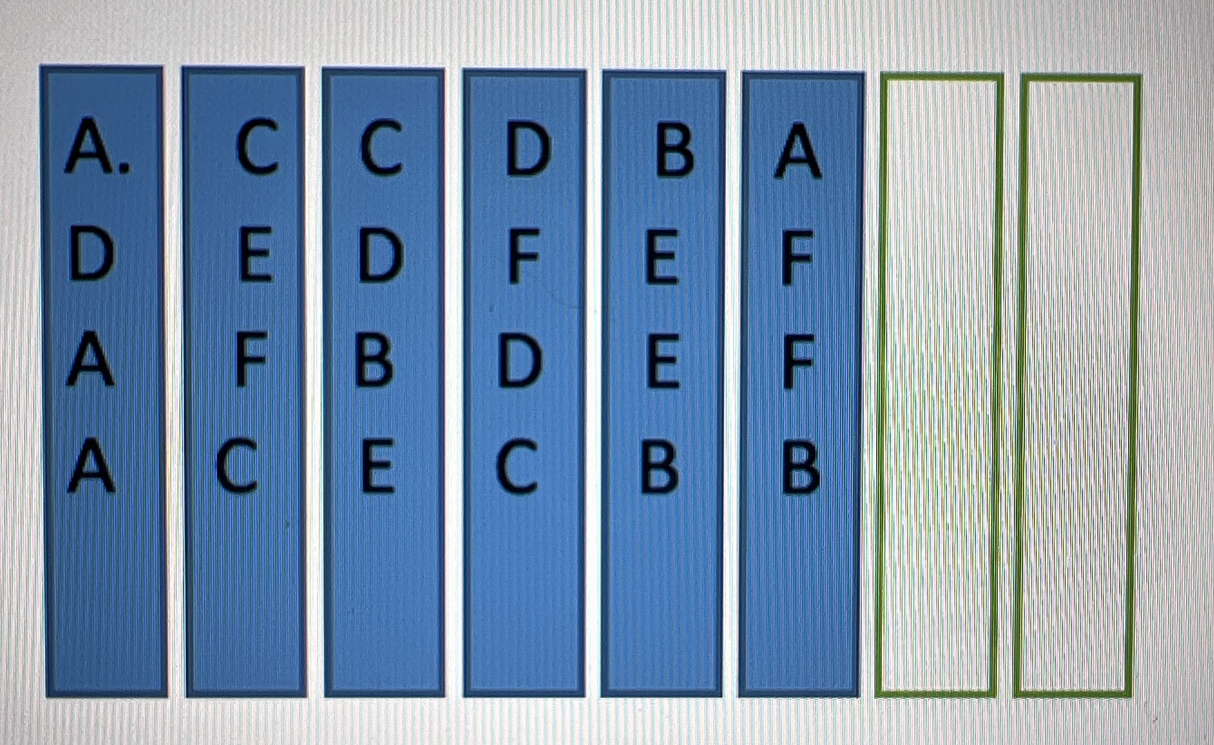

game download:

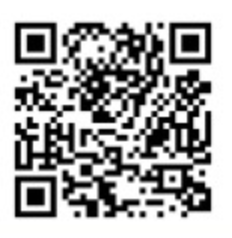

#About the game

The game is based around a collection of containers that are filled with coloured items. Each container has a limited capacity (for the example games above, 4 items). The goal is to sort the colours such that all items for each unique colour are moved into the same container following a simple set of rules. There is no time limit.

#Rules

You can only move the top most colour from one container to another
You can only move a colour into a container if the top most colour is the same, unless the container is empty
You can only move a colour into a container that is not already at it's maximum capaicty
If there are multiple concurrent items of the same colour in the source contianer, all will be transfered to the destination container until it reaches it's maximum capacity.

#How does the solver work

Given a starting pattern the solver can perform either a Breadth-first search or a Depth-first search. Once a valid solution is found, the search is completed and the final grid and all the moves taken to get there are output.

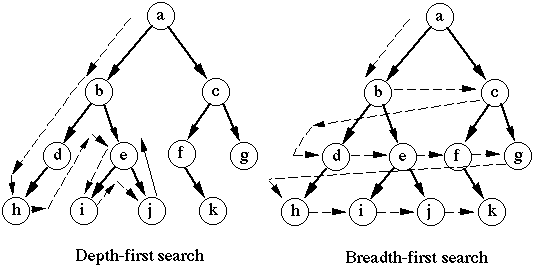

#Breadth-First Search

The breadth first algorithm will always find the shortest path to a solution, sacraficing the time to find a solution in favour of ensuring the solution is optimal. The starting pattern is evaluated to find all possible moves and this forms a queue of next patterns. Then each pattern in the queue is evaluted one-by-one, finding all possible moves that have not already been visited and placing them into the queue. This is repeated until the queue is empty or a solution is found.

#Depth-First Search

The depth first algorithm will find a solution as quickly as possible. The trade-off here is that the solution may not be an optional solution, but it is found far quicker. All possible moves are evaluted recursively following down the tree as quickly as possible until a solution is found.

In [ ]:
#Importing libs
import random
import numpy as np 
from collections import deque
#Game Generator
class Game:
    #Initialization
    def __init__(self):
        self.initialize_game()
    #Generates random game
    def initialize_game(self):
        a = [i for i in 'ABCDEF'*4]
        b = [i for i in 'XX'*4]
        random.shuffle(a)
        MyLst = np.concatenate((np.array(a).reshape(4,6),np.array(b).
                                reshape(4,2)),axis=1)
        self.current_state = MyLst
    #Displays game
    def Game_Disp(self):
        print(str(self.current_state).replace('[',' ').replace(']',' ').
                                      replace("' '", " | ").replace("'"," | ").
                                      replace(" ","").replace("X"," "))
    #Mapping Chars to Nums for solver
    def Map2Num(self):
      temp = self.current_state
      temp[temp == 'X'] = 0
      temp[temp == 'A'] = 1
      temp[temp == 'B'] = 2
      temp[temp == 'C'] = 3
      temp[temp == 'D'] = 4
      temp[temp == 'E'] = 5
      temp[temp == 'F'] = 6
      out = temp.astype(np.intc)
      return out     
#Solver
class ColoredWater:
    def __init__(self, pos):
        self.pos = pos

    @staticmethod
    def get_first_non_zero(arr):
        try:
            return arr[arr != 0][0]
        except IndexError:
            return 0

    @staticmethod
    def get_first_non_zero_index(arr):
        try:
            return np.where(arr != 0)[0][0]
        except IndexError:
            return 3

    @staticmethod
    def get_last_zero_index(arr):
        try:
            return np.where(arr == 0)[0][-1]
        except IndexError:
            return 3

    def get_legal_moves_to(self, moveable_to):
        first_non_zero = self.first_non_zero
        n = first_non_zero.shape[0]
        if first_non_zero[moveable_to] == 0:
            return np.where((first_non_zero != 0) & (np.arange(n) != moveable_to))[0], moveable_to
        else:
            return np.where((first_non_zero == first_non_zero[moveable_to]) & (np.arange(n) != moveable_to))[0], moveable_to

    def swap(self, i, j):
        out = self.pos.copy()
        idx_from = (self.get_first_non_zero_index(self.pos[:, i]), i)
        idx_to = (self.get_last_zero_index(self.pos[:, j]), j)
        out[idx_from], out[idx_to] = out[idx_to], out[idx_from]
        return ColoredWater(out)

    def isgoal(self):
        return np.array_equiv(self.pos, self.pos[0])

    def __iter__(self):
        self.first_non_zero = np.apply_along_axis(self.get_first_non_zero, 0, self.pos)
        moveable_to = np.where(self.pos[0] == 0)[0]
        legal_moves = tuple(map(self.get_legal_moves_to, moveable_to))

        out = [self.swap(origin, target)
               for origins, target in legal_moves
               for origin in origins]   

        def number_of_full_stacks(pos):
            return np.sum(np.all((pos == [pos[0]]), axis=0))

        def fillings_of_stacks(game):
            pos = game.pos
            return number_of_full_stacks(pos), number_of_full_stacks(pos[1:]), number_of_full_stacks(pos[2:])

        return iter(sorted(out, key=fillings_of_stacks, reverse=True))

    def set_rep(self):
        return frozenset(map(tuple, self.pos.T))

    def __repr__(self):
        return repr(self.pos)

    def solve(pos, depthFirst=False):
        queue = deque([pos])
        trail = {pos.set_rep(): None}
        solution = deque()
        load = queue.append if depthFirst else queue.appendleft
        iter = 0
        while not pos.isgoal():
            for m in pos:
                if m.set_rep() in trail:
                    continue
                trail[m.set_rep()] = pos
                load(m)
            pos = queue.pop()
        while pos:
            iter = iter + 1
            out = str(pos).replace('[',' ').replace(']',' ').\
                           replace("' '", " | ").replace("'"," | ").\
                           replace("dtype=int32",'').replace("array",'').\
                           replace("\n","|").replace(" ","").replace(",","|").\
                           replace('0',' ').replace('1','A').replace('2','B').\
                           replace('3','C').replace('4','D').replace('5','E').\
                           replace('6','F').replace(')','').replace('(','|')             

            solution.appendleft(out)
            pos = trail[pos.set_rep()]
        return (iter, list(solution))
     
def PrintOut(MyList):
  iter = 1
  for i in MyList:
    print('Iteration {}: '.format(iter))
    print(str(i).replace("||","|\n|"))
    iter = iter + 1
    print()


#Generating Game

In [ ]:
New_Game = Game()
New_Game.initialize_game()
New_Game.Game_Disp()
MyGame = New_Game.Map2Num()

|C|A|D|A|D|E| | |
|C|F|E|B|D|F| | |
|F|A|D|B|C|B| | |
|F|C|E|B|E|A| | |


#Depth-First Search

In [ ]:
(iter_DFS, MySol_DFS) = ColoredWater(MyGame).solve(depthFirst=True)
print('DFS total iter:{}\n'.format(iter_DFS))

DFS total iter:65



#Print DFS Iterations

In [ ]:
PrintOut(MySol_DFS)

Iteration 1: 
|C|A|D|A|D|E| | |
|C|F|E|B|D|F| | |
|F|A|D|B|C|B| | |
|F|C|E|B|E|A| | |

Iteration 2: 
|C|A|D|A|D| | | |
|C|F|E|B|D|F| | |
|F|A|D|B|C|B| | |
|F|C|E|B|E|A|E| |

Iteration 3: 
|C|A|D|A| | | | |
|C|F|E|B|D|F| | |
|F|A|D|B|C|B| | |
|F|C|E|B|E|A|E|D|

Iteration 4: 
|C|A|D|A| | | | |
|C|F|E|B| |F| | |
|F|A|D|B|C|B| |D|
|F|C|E|B|E|A|E|D|

Iteration 5: 
| |A|D|A| | | | |
|C|F|E|B|C|F| | |
|F|A|D|B|C|B| |D|
|F|C|E|B|E|A|E|D|

Iteration 6: 
| |A|D|A|C| | | |
| |F|E|B|C|F| | |
|F|A|D|B|C|B| |D|
|F|C|E|B|E|A|E|D|

Iteration 7: 
| |A|D|A|C|F| | |
| |F|E|B|C|F| | |
| |A|D|B|C|B| |D|
|F|C|E|B|E|A|E|D|

Iteration 8: 
| |A| |A|C|F| | |
| |F|E|B|C|F| |D|
| |A|D|B|C|B| |D|
|F|C|E|B|E|A|E|D|

Iteration 9: 
| |A| |A|C|F| | |
| |F| |B|C|F| |D|
| |A|D|B|C|B|E|D|
|F|C|E|B|E|A|E|D|

Iteration 10: 
| |A| |A|C|F| | |
| |F|D|B|C|F| | |
| |A|D|B|C|B|E|D|
|F|C|E|B|E|A|E|D|

Iteration 11: 
| |A|D|A|C|F| | |
| |F|D|B|C|F| | |
| |A|D|B|C|B|E| |
|F|C|E|B|E|A|E|D|

Iteration 12: 
| |A|D|A|C| | | |
| |F|D|B

#breadth_first search

In [ ]:
(iter_BFS, MySol_BSF) = ColoredWater(MyGame).solve(depthFirst=False)
print('BFS total iter:{}\n'.format(iter_BFS))

BFS total iter:19



##Print BFS Iterations

In [ ]:
PrintOut(MySol_BSF)

Iteration 1: 
|C|A|D|A|D|E| | |
|C|F|E|B|D|F| | |
|F|A|D|B|C|B| | |
|F|C|E|B|E|A| | |

Iteration 2: 
| |A|D|A|D|E| | |
|C|F|E|B|D|F| | |
|F|A|D|B|C|B| | |
|F|C|E|B|E|A|C| |

Iteration 3: 
| |A|D|A|D|E| | |
| |F|E|B|D|F| | |
|F|A|D|B|C|B|C| |
|F|C|E|B|E|A|C| |

Iteration 4: 
| | |D|A|D|E| | |
| |F|E|B|D|F| | |
|F|A|D|B|C|B|C| |
|F|C|E|B|E|A|C|A|

Iteration 5: 
| | |D|A|D|E| | |
|F| |E|B|D|F| | |
|F|A|D|B|C|B|C| |
|F|C|E|B|E|A|C|A|

Iteration 6: 
| | |D|A|D|E| | |
|F| |E|B|D|F| | |
|F| |D|B|C|B|C|A|
|F|C|E|B|E|A|C|A|

Iteration 7: 
| | |D|A|D|E| | |
|F| |E|B|D|F|C| |
|F| |D|B|C|B|C|A|
|F| |E|B|E|A|C|A|

Iteration 8: 
| | |D| |D|E| | |
|F| |E|B|D|F|C|A|
|F| |D|B|C|B|C|A|
|F| |E|B|E|A|C|A|

Iteration 9: 
| | | | |D|E| | |
|F| |E|B|D|F|C|A|
|F| |D|B|C|B|C|A|
|F|D|E|B|E|A|C|A|

Iteration 10: 
| | | | | |E| | |
|F| |E|B|D|F|C|A|
|F|D|D|B|C|B|C|A|
|F|D|E|B|E|A|C|A|

Iteration 11: 
| | | | | |E| | |
|F|D|E|B| |F|C|A|
|F|D|D|B|C|B|C|A|
|F|D|E|B|E|A|C|A|

Iteration 12: 
| | | | | |E|C| |
|F|D|E|B

#References

##Question 2 - Water Sort

1. https://rhettinger.github.io/puzzle.html
2. https://stackoverflow.com/questions/69198052/finding-the-shortest-path-to-solve-colored-water-sorting-games 
3. https://github.com/discorev/colour-puzzle-solver 